# КОМПЛЕКСНОЕ ИССЛЕДОВАНИЕ ДАННЫХ
[Andrej Marinchenko](https://github.com/BEPb) - 01.2023

----------

<b>'Самое сложное в жизни - это познать себя'</b>

Эта цитата принадлежит Фалесу Милетскому. Фалес был греческим/фонецианским философом, математиком и астрономом, который признан первым человеком в западной цивилизации, который, как известно, развлекался и занимался научной мыслью (источник: https://en.wikipedia.org/wiki/Thales)

Я бы не сказал, что знание ваших данных — это самое сложное в науке о данных, но это отнимает много времени. Поэтому легко пропустить этот начальный шаг и слишком рано прыгнуть в воду.

Поэтому я пытался научиться плавать, прежде чем прыгнуть в воду. Я сделал все возможное, чтобы выполнить всесторонний, но не исчерпывающий анализ данных. Я далек от того, чтобы сообщить о тщательном исследовании этого ядра, но я надеюсь, что оно может быть полезным для сообщества, поэтому я делюсь тем, как я применил некоторые из этих принципов анализа данных к этой проблеме.

Несмотря на странные названия, которые я дал главам, то, что мы делаем в этом ядре, выглядит примерно так:

1. <b>Понять проблему</b>. Мы рассмотрим каждую переменную и проведем философский анализ их значения и важности для этой проблемы.
2. <b>Унивариантное исследование</b>. Мы просто сосредоточимся на зависимой переменной и попытаемся узнать о ней немного больше.
3. <b>Многофакторное исследование</b>. Мы попытаемся понять, как связаны зависимая переменная и независимые переменные.
4. <b>Основная очистка</b>. Мы очистим набор данных и обработаем недостающие данные, выбросы и категориальные переменные.
5. <b>Проверить предположения</b>. Мы проверим, соответствуют ли наши данные предположениям, требуемым для большинства многомерных методов.

Теперь пришло время повеселиться!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 1. Итак... Чего нам ожидать?
​
Чтобы понять наши данные, мы можем посмотреть на каждую переменную и попытаться понять их значение и отношение к этой проблеме. Я знаю, что это отнимает много времени, но это даст нам представление о нашем наборе данных.
​
Чтобы иметь некоторую дисциплину в нашем анализе, мы можем создать электронную таблицу Excel со следующими столбцами:
* <b>Переменная</b> — имя переменной.
* <b>Тип</b> — Идентификация типа переменных. Есть два возможных значения для этого поля: «числовой» или «категориальный». Под «числовыми» мы подразумеваем переменные, для которых значения являются числами, а под «категориальными» мы подразумеваем переменные, для которых значения являются категориями.
* <b>Сегмент</b> — Идентификация сегмента переменных. Мы можем определить три возможных сегмента: здание, пространство или местоположение. Когда мы говорим «здание», мы имеем в виду переменную, относящуюся к физическим характеристикам здания (например, «Общее качество»). Когда мы говорим «пространство», мы имеем в виду переменную, которая сообщает пространственные свойства дома (например, «TotalBsmtSF»). Наконец, когда мы говорим «местоположение», мы имеем в виду переменную, которая дает информацию о месте, где расположен дом (например, «Район»).
* <b>Ожидание</b> — наше ожидание относительно влияния переменной в «Цена продажи». Мы можем использовать категориальную шкалу с возможными значениями «Высокий», «Средний» и «Низкий».
* <b>Заключение</b> — наши выводы о важности переменной после беглого просмотра данных. Мы можем придерживаться той же категориальной шкалы, что и в «Ожидании».
* <b>Комментарии</b> — любые общие комментарии, которые пришли нам в голову.
​
В то время как «Тип» и «Сегмент» предназначены только для возможного использования в будущем, столбец «Ожидание» важен, потому что он поможет нам развить «шестое чувство». Чтобы заполнить эту колонку, мы должны прочитать описание всех переменных и, одну за другой, спросить себя:
​
* Думаем ли мы об этой переменной, когда покупаем дом? (например, когда мы думаем о доме нашей мечты, заботимся ли мы о его «типе облицовки каменной кладкой»?).
* Если да, то насколько важной может быть эта переменная? (например, как влияет наличие материала «Отлично» на внешнем виде вместо «Плохо»? И наличие «Отлично» вместо «Хорошо»?).
* Эта информация уже описана в какой-либо другой переменной? (например, если «Контур земной поверхности» определяет плоскостность объекта, действительно ли нам нужно знать «Уклон земной поверхности»?).

# 1. Итак... Чего нам ожидать?

Чтобы понять наши данные, мы можем посмотреть на каждую переменную и попытаться понять их значение и отношение к этой проблеме. Я знаю, что это отнимает много времени, но это даст нам представление о нашем наборе данных.

Чтобы иметь некоторую дисциплину в нашем анализе, мы можем создать электронную таблицу Excel со следующими столбцами:
* <b>Переменная</b> — имя переменной.
* <b>Тип</b> — Идентификация типа переменных. Есть два возможных значения для этого поля: «числовой» или «категориальный». Под «числовыми» мы подразумеваем переменные, для которых значения являются числами, а под «категориальными» мы подразумеваем переменные, для которых значения являются категориями.
* <b>Сегмент</b> — Идентификация сегмента переменных. Мы можем определить сегмент или категорию на каторую делится наш набор данных.
* <b>Ожидание</b> — наше ожидание относительно влияния переменной на результат. Мы можем использовать категориальную шкалу с возможными значениями «Высокий», «Средний» и «Низкий».
* <b>Заключение</b> — наши выводы о важности переменной после беглого просмотра данных. Мы можем придерживаться той же категориальной шкалы, что и в «Ожидании».
* <b>Комментарии</b> — любые общие комментарии, которые пришли нам в голову.

В то время как «Тип» и «Сегмент» предназначены только для возможного использования в будущем, столбец «Ожидание» важен, потому что он поможет нам развить «шестое чувство». Чтобы заполнить эту колонку, мы должны прочитать описание всех переменных и, одну за другой, спросить себя:

* Думаем ли мы об этой переменной, когда получаем искомый результат? 
* Если да, то насколько важной может быть эта переменная? 
* Эта информация уже описана в какой-либо другой переменной?

После этого сложного упражнения мы можем отфильтровать электронную таблицу и внимательно посмотреть на переменные с «Высоким» «Ожиданием». Затем мы можем перейти к некоторым графикам разброса между этими переменными и «Целевой переменной», заполнив столбец «Вывод», который является просто исправлением наших ожиданий.

Каждый должен пройти через этот процесс и прийти к выводу, какие переменные могут играть важную роль в этой проблеме?


Тем не менее, основная цель этого упражнения заключалась в том, чтобы немного подумать о наших данных и ожиданиях, поэтому я думаю, что мы достигли своей цели. Теперь пришло время для «немного меньше разговоров, немного больше действий, пожалуйста». Давайте <b>встряхнем это соревнование!</b>

# 2. Перво-наперво: анализ «Целевой переменной»

«Survived» является причиной нашего поиска. Это как когда мы собираемся на вечеринку. У нас всегда есть причина быть там. Обычно такой причиной являются женщины. (отказ от ответственности: адаптируйте его к мужчинам, танцам или алкоголю, в соответствии с вашими предпочтениями)

Используя аналогию с женщинами, давайте создадим небольшую историю, историю «Как мы встретили «Целевую переменную».

*Все началось на нашей Kaggle вечеринке, когда мы искали партнера по танцам. Через некоторое время поиска на танцполе мы увидели возле бара девушку в танцевальных туфлях. Это знак того, что она здесь, чтобы танцевать. Мы тратим много времени на прогнозное моделирование и участие в конкурсах аналитиков, поэтому общение с девушками не входит в число наших суперспособностей. Тем не менее, мы попробовали:*

* «Привет, я Каггли! А ты? "Целевая переменная"? Какое красивое имя! Вы знаете «Целевая переменная», не могли бы вы дать мне некоторые данные о вас? Я только что разработал модель для расчета вероятности успешных отношений между двумя людьми. Я хотел бы применить это к нам!»*

In [4]:
#описательная сводка статистики
df_train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

*'Очень хорошо... Отлично! У тебя нет ни одной из тех личных черт, которые разрушили бы мою модель! У вас есть какая-нибудь фотография, которую вы можете отправить мне? Я не знаю... типа, ты на пляже... или, может быть, селфи в спортзале?'*

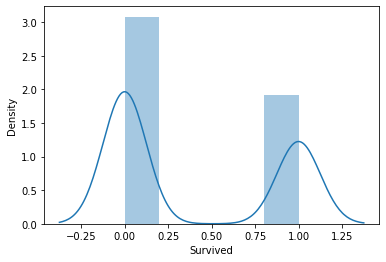

In [5]:

#гистограмма
sns.distplot(df_train['Survived']);

*'Ах! Я вижу, ты пользуешься косметикой морской волны, когда выходишь на улицу... Это так элегантно! Я также вижу, что вы: *

* *<b>Отклонение от нормального распределения.</b>*
* *<b>Имеет заметную положительную асимметрию.</b>*
* *<b>Показать остроконечность.</b>*

* Становится интересно! 'Целевая переменная', не могли бы вы дать мне мерки вашего тела?'*

In [6]:
#асимметрия и эксцесс
print("асимметрия: %f" % df_train['Survived'].skew())
print("эксцесс: %f" % df_train['Survived'].kurt())

асимметрия: 0.478523
эксцесс: -1.775005


*'Удивительный! Если мой калькулятор любви верен, наша вероятность успеха составляет 97,834657%. Я думаю, мы должны встретиться снова! Пожалуйста, сохраните мой номер и позвоните мне, если будете свободны в следующую пятницу. До скорой встречи, крокодил!»*

# 'Survived', ее друзья и ее интересы

* Военная мудрость - выбрать местность, на которой вы будете сражаться. Как только «Целевая переменная» ушел, мы пошли в Facebook. Да, теперь это становится серьезным. Обратите внимание, что это не преследование. Это просто интенсивное исследование человека, если вы понимаете, о чем я.*

* Судя по ее профилю, у нас есть общие друзья. Помимо Чака Норриса, мы оба знаем другие переменные. Более того, у нас также есть общие интересы. Выглядит многообещающе!*

*Чтобы получить максимальную отдачу от нашего исследования, мы начнем с внимательного изучения профилей наших общих друзей, а позже сосредоточимся на наших общих интересах.*

### Связь с числовыми переменными

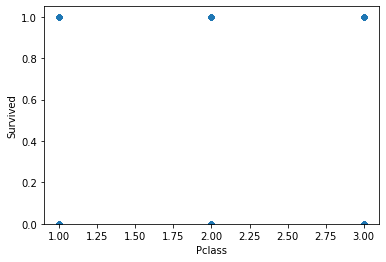

In [7]:
#scatter plot 
# 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
var = 'Pclass'
data = pd.concat([df_train['Survived'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Survived', ylim=(0));

Итак мы выдим, что как пассажиры 1-го, так и 2-го и 3-го классов в рядах спасенных и умерших.

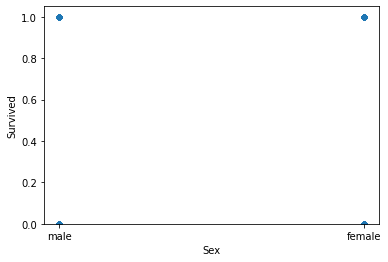

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'Sex'
data = pd.concat([df_train['Survived'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Survived', ylim=(0));

Так же мы видим, что и мужчины и женщины и спасались и погибали на титанике.

### Связь с категориальными признаками

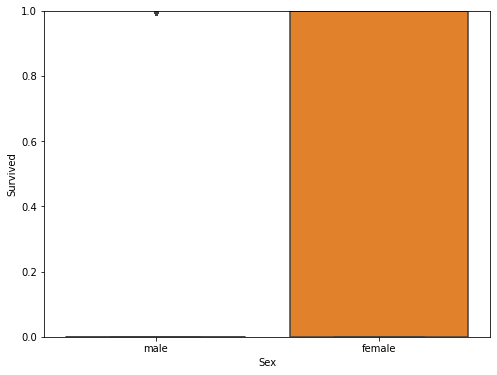

In [9]:
#box plot overallqual/saleprice
var = 'Sex'
data = pd.concat([df_train['Survived'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Survived", data=data)
fig.axis(ymin=0, ymax=1);

Но спасенных женщин в разы больше чем спасенных мужчин

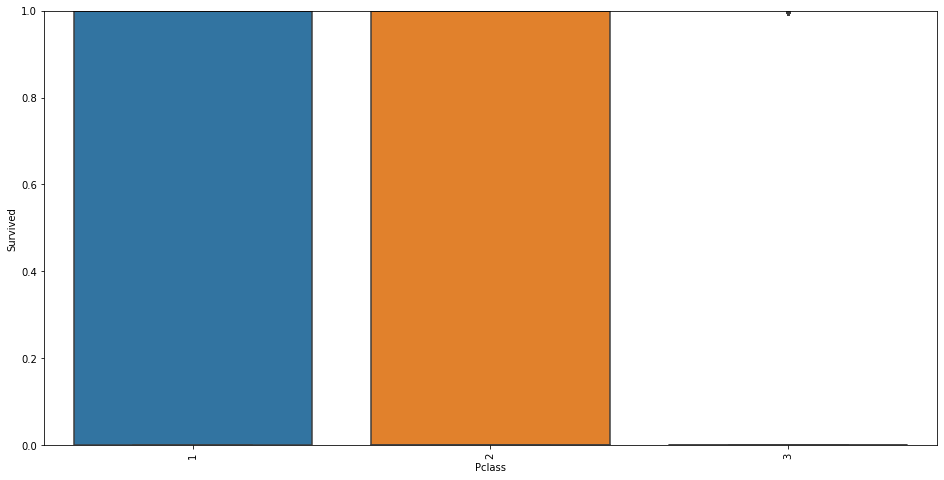

In [10]:
var = 'Pclass'
data = pd.concat([df_train['Survived'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Survived", data=data)
fig.axis(ymin=0, ymax=1);
plt.xticks(rotation=90);

А вот количество спасенных 1-го и 2-го класса в разы больше чем спасенных в третьем классе.

### В итоге

Если отбросить истории, то можно сделать вывод, что:


Мы только что проанализировали несколько переменных, но есть много других, которые мы должны проанализировать. Хитрость здесь, кажется, заключается в выборе правильных функций (выбор функций), а не в определении сложных отношений между ними (инженерия функций).

Тем не менее, давайте отделим зёрна от плевел.

# 3. Сохраняйте спокойствие и работайте с умом

До сих пор мы просто следовали своей интуиции и анализировали переменные, которые считали важными. Несмотря на наши усилия придать объективный характер нашему анализу, мы должны сказать, что наша исходная точка была субъективной.

Мне, как инженеру, такой подход не нравится. Все мое образование было направлено на развитие дисциплинированного ума, способного противостоять ветрам субъективности. На это есть причина. Попробуйте быть субъективным в проектировании конструкций, и вы увидите, как физика заставляет вещи рушиться. Это может повредить.

Итак, давайте преодолеем инерцию и проведем более объективный анализ.

### «Плазменный суп»

«В самом начале не было ничего, кроме плазменного супа. То, что известно об этих кратких моментах времени в начале нашего изучения космологии, в значительной степени является предположительным. Однако наука разработала некоторый набросок того, что, вероятно, произошло, основываясь на том, что сегодня известно о Вселенной».

Чтобы исследовать вселенную, мы начнем с некоторых практических рецептов, чтобы понять смысл нашего «плазменного супа»:
* Матрица корреляции (стиль тепловой карты).
* Матрица корреляции «Целевая переменная» (увеличенная тепловая карта).
* Графики разброса между наиболее коррелированными переменными (движение в стиле Джаггера).

#### Correlation matrix (heatmap style)

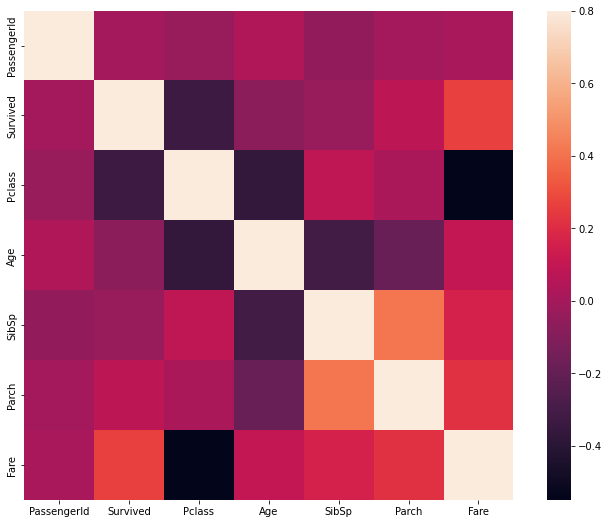

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

На мой взгляд, эта тепловая карта — лучший способ получить быстрый обзор нашего «плазменного супа» и его взаимосвязей. (Спасибо, @seaborn!)

Эта карта во всех случая показывает, насколько значительна корреляция между переменными. Но нужно быть осторожным т.к. иногда на самом деле это может указывать на ситуацию мультиколлинеарности, т.е. тот случай когда разные переменные дают почти одинаковую информацию, поэтому мультиколлинеарность действительно имеет место. Тепловые карты отлично подходят для обнаружения подобных ситуаций, а в задачах, в которых преобладает выбор функций, таких как наша, они являются важным инструментом.


#### 'SalePrice' correlation matrix (zoomed heatmap style)

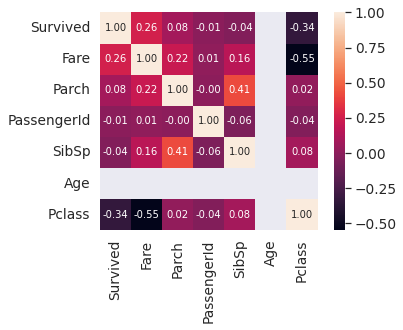

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Согласно нашему хрустальному шару, эти переменные больше всего коррелируют с «Survived». Мои мысли по этому поводу:

Перейдем к точечным графикам.

#### Диаграммы разброса между «SalePrice» и коррелированными переменными (движение в стиле Джаггера)

Будьте готовы к тому, что вы собираетесь увидеть. Должен признаться, что когда я впервые увидел эти точечные графики, я был просто поражен! Так много информации в столь коротком пространстве... Это просто потрясающе. Еще раз спасибо @seaborn! Ты заставляешь меня двигаться как Джаггер!

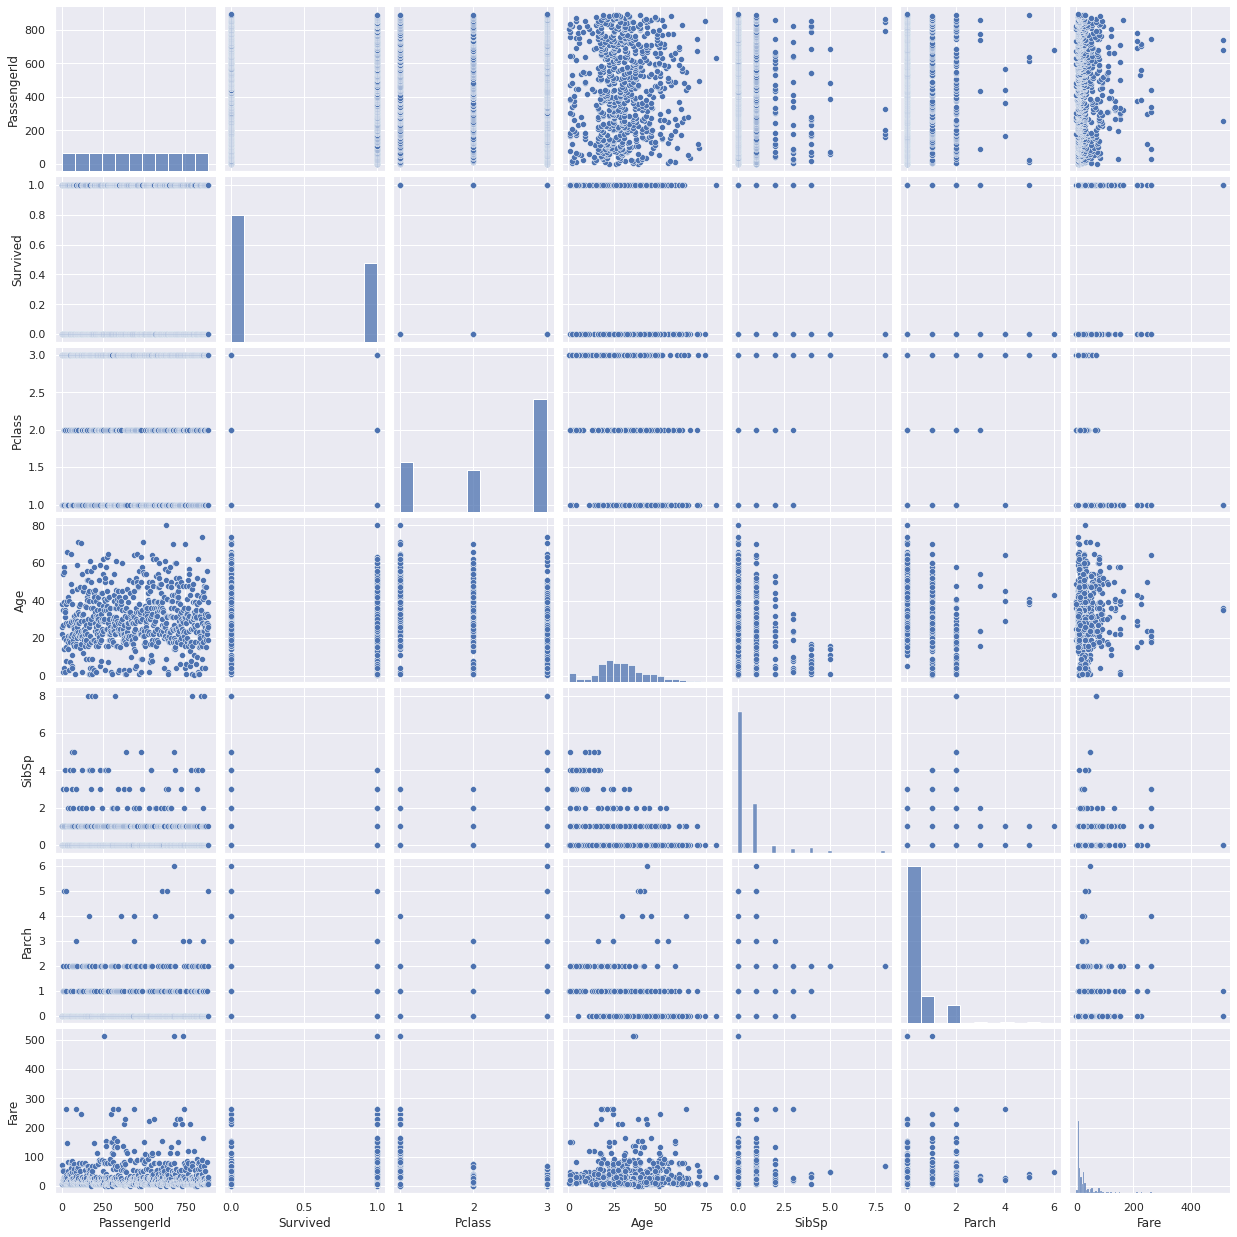

In [13]:
#scatterplot
sns.set()
cols = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Хотя мы уже знаем некоторые из основных цифр, этот мегаграфик рассеяния дает нам разумное представление о взаимосвязях между переменными.

Ладно, хватит теста Роршаха. Давайте перейдем к тому, чего не хватает: недостающих данных!

№ 4. Отсутствующие данные

Важные вопросы при размышлении об отсутствующих данных:

* Насколько распространены недостающие данные?
* Являются ли отсутствующие данные случайными или имеют закономерность?

Ответ на эти вопросы важен по практическим причинам, поскольку отсутствие данных может означать сокращение размера выборки. Это может помешать нам продолжить анализ. Более того, с точки зрения существа, нам необходимо убедиться, что процесс отсутствующих данных не является предвзятым и не скрывает неудобную правду.

In [14]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Давайте проанализируем это, чтобы понять, как обрабатывать недостающие данные.

Мы будем считать, что когда более 15% данных отсутствует, мы должны удалить соответствующую переменную и сделать вид, что ее никогда не существовало. Это означает, что мы не будем пытаться заполнить недостающие данные в этих случаях. В соответствии с этим существует набор переменных (например, «Cabin», «Age» и т. д.), которые мы должны удалить. Вопрос в том, не пропустим ли мы эти данные? Я так не думаю. Ни одна из этих переменных не кажется очень важной, поскольку большинство из них не являются аспектами, о которых мы думаем при покупке дома (может быть, поэтому данные отсутствуют?).

Наконец, у нас есть два отсутствующих наблюдения в «Embarked». Поскольку это всего лишь одно наблюдение, мы удалим это наблюдение и сохраним переменную.

Таким образом, для обработки отсутствующих данных мы удалим все переменные с отсутствующими данными, кроме переменной «Embarked». 

In [15]:
# работа с отсутствующими данными
# df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
# df_train = df_train.drop(df_train.loc[df_train['Embarked'].isnull()].index)
# df_train.isnull().sum().max() # просто проверяем, что нет пропущенных данных...

# Вон лжецы!

Выбросы — это тоже то, о чем мы должны знать. Почему? Потому что выбросы могут заметно повлиять на наши модели и могут быть ценным источником информации, дающим нам представление о конкретном поведении.

Выбросы — сложная тема, и она заслуживает большего внимания. Здесь мы просто проведем быстрый анализ стандартного отклонения «SalePrice» и набора диаграмм рассеяния.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [16]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['Survived'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('внешний диапазон (низкий) распределения:')
print(low_range)
print('\n внешний диапазон (верхний) распределения:')
print(high_range)

внешний диапазон (низкий) распределения:
[[-0.78927234]
 [-0.78927234]
 [-0.78927234]
 [-0.78927234]
 [-0.78927234]
 [-0.78927234]
 [-0.78927234]
 [-0.78927234]
 [-0.78927234]
 [-0.78927234]]

 внешний диапазон (верхний) распределения:
[[1.2669898]
 [1.2669898]
 [1.2669898]
 [1.2669898]
 [1.2669898]
 [1.2669898]
 [1.2669898]
 [1.2669898]
 [1.2669898]
 [1.2669898]]


Как выглядит «Survived» в новой одежде:

* Значения нижнего диапазона аналогичны и не слишком далеки от -0.7.
* Значения верхнего диапазона аналогичны и не слишком далеки от -1.26.

На данный момент выбросы не обнаружены

# 5. Получение хардкора

В романе Айн Рэнд «Атлант расправил плечи» часто повторяется вопрос: кто такой Джон Галт? Большая часть книги посвящена поиску ответа на этот вопрос.

Теперь я чувствую Рэндиана. Кто такой «Целевая переменная»?

Ответ на этот вопрос заключается в проверке предположений, лежащих в основе статистических основ многомерного анализа. Мы уже провели некоторую очистку данных и многое узнали о «Целевой переменной». Теперь пришло время углубиться и понять, как она соответствует статистическим предположениям, что позволяет нам применять многомерные методы.

необходимо проверить четыре предположения:

* <b>Нормальность</b>. Когда мы говорим о нормальности, мы имеем в виду, что данные должны выглядеть как нормальное распределение. Это важно, потому что на этом основаны некоторые статистические тесты (например, t-статистика). Помните, что одномерная нормальность не гарантирует многомерную нормальность (а это то, что нам хотелось бы иметь), но помогает. Еще одна деталь, которую следует учитывать, заключается в том, что в больших выборках (> 200 наблюдений) нормальность не является такой проблемой. Однако, если мы решим нормальность, мы избежим многих других проблем (например, гетероскедатичности), так что это основная причина, по которой мы проводим этот анализ.

* <b>Гомоскедастичность</b> — я просто надеюсь, что написал правильно. Гомоскедастичность относится к «предположению, что зависимая переменная (переменные) демонстрирует одинаковые уровни дисперсии во всем диапазоне переменных-предикторов». Гомоскедастичность желательна, потому что мы хотим, чтобы член ошибки был одинаковым для всех значений независимых переменных.

* <b>Линейность</b>. Самый распространенный способ оценить линейность – это изучить графики рассеяния и найти линейные закономерности. Если закономерности нелинейны, стоит изучить преобразования данных. Однако мы не будем вдаваться в подробности, потому что большинство графиков рассеяния, которые мы видели, имеют линейные зависимости.

* <b>Отсутствие коррелированных ошибок</b>. Коррелированные ошибки, как следует из определения, возникают, когда одна ошибка коррелирует с другой. Например, если одна положительная ошибка систематически вызывает отрицательную ошибку, это означает, что между этими переменными существует связь. Это часто происходит во временных рядах, где некоторые закономерности связаны со временем. Мы тоже не будем вдаваться в это. Однако, если вы что-то обнаружите, попробуйте добавить переменную, которая может объяснить получаемый вами эффект. Это наиболее распространенное решение для коррелированных ошибок.

Как вы думаете, что бы сказал Элвис об этом длинном объяснении? «Меньше разговоров, больше действий, пожалуйста»? Возможно... Кстати, вы знаете, какой последний хит Элвиса был последним?

(...)

Пол в ванной.

### В поисках нормальности

Суть здесь в том, чтобы протестировать «SalePrice» очень бережливым способом. Мы сделаем это, обратив внимание на:

* <b>Гистограмма</b> — эксцесс и асимметрия.
* <b>График нормальной вероятности</b>. Распределение данных должно точно следовать диагонали, представляющей нормальное распределение.

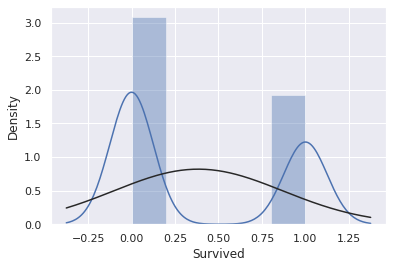

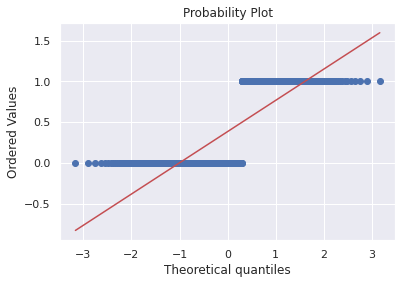

In [17]:
#histogram and normal probability plot
sns.distplot(df_train['Survived'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Survived'], plot=plt)

# И последнее, но не менее важное: фиктивные переменные

Easy mode.

In [18]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

# Заключение

Вот и все! Мы подошли к концу нашего упражнения.

В этом ядре мы применяем на практике многие стратегии, предложенные. Мы философски относились к переменным, мы анализировали их отдельно и с наиболее коррелированными переменными, мы имели дело с отсутствующими данными и выбросами, мы проверили некоторые фундаментальные статистические предположения. Это большой объем работы, которую Python помог нам упростить.

Но квест не окончен. Это зависит от вас, чтобы узнать.